In [1]:
# Day 1
# Part one
with open('day1.txt') as fid:
    data = fid.read().strip().split('\n')
number_set = set('0123456789')
number_sum = 0
for d in data:
    numbers = [s for s in d if s in number_set]
    number_sum += int(numbers[0] + numbers[-1])
print(number_sum)

# Part two
number_list = [c for c in '0123456789'] + ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
number_sum = 0
for d in data:
    first_val = min([(s, index) for index, n in enumerate(number_list) if (s := d.find(n))  != -1])[1] % 10
    last_val  = max([(s, index) for index, n in enumerate(number_list) if (s := d.rfind(n)) != -1])[1] % 10
    number_sum += int(str(first_val) + str(last_val))
print(number_sum)

54597
54504


In [2]:
# Day 2
# Part one
with open('day2.txt') as fid:
    data = fid.read().strip().split('\n')
games = []
colour_index = {'red':0, 'green':1, 'blue':2}
for line in data:
    turns = line.split(':')[1].split(';')
    this_game = []
    for t in turns:
        this_turn = [0, 0, 0]
        for colour_and_number in t.split(','):
            number, colour = colour_and_number.strip().split()
            this_turn[colour_index[colour]] = int(number)
        this_game.append(this_turn)
    games.append(this_game)
id_sum = 0
# 12 red cubes, 13 green cubes, and 14 blue cubes
limit = [12, 13, 14]
for game_id_minus_one, game in enumerate(games):
    game_impossible = False
    for t in game:
        if t[0] > limit[0] or t[1] > limit[1] or t[2] > limit[2]:
            game_impossible = True
            break
    if not game_impossible:
        id_sum += game_id_minus_one + 1
            
print(id_sum)

#Part two
power_sum = 0
for game in games:
    required = [0, 0, 0]
    for t in game:
        for index in range(3):
            required[index] = max(required[index], t[index])
    power_sum += required[0]*required[1]*required[2]
print(power_sum)

2679
77607


In [3]:
# Day 3
# Part one
from collections import defaultdict
with open('day3.txt') as fid:
    engine_map = [c for c in fid.read()]

Nx = engine_map.index('\n') + 1
Ny = len(engine_map)//Nx

all_numbers = []
dict_of_potential_gears = defaultdict(list)
number = []
digits = set(c for c in '0123456789')
digits_and_dot = {'.', '\n'} | digits
for flatidx, c in enumerate(engine_map):
    if c in digits:
        number.append(c)
    elif number:
        #New number, check:
        j, i = flatidx // Nx, flatidx % Nx
        ndigits = len(number)
        check_point_offsets = [(-1,0), (ndigits,0)] + [(nd,1) for nd in range(-1, ndigits + 1)] + [(nd,-1) for nd in range(-1, ndigits + 1)]
        start_point = (j, i - ndigits)
        add_number = False
        for di, dj in check_point_offsets:
            jj, ii = start_point[0] + dj, start_point[1] + di
            if not ((0 <= ii < Nx) and (0 <= jj < Ny)):
                continue
            flat_idx_test = jj*Nx + ii
            if engine_map[flat_idx_test] not in digits_and_dot:
                add_number = True
                if engine_map[flat_idx_test] == '*':
                    dict_of_potential_gears[flat_idx_test].append(int(''.join(number)))
                # We cannot break here, since there could be multiple * around a number
        if add_number:
            all_numbers.append(int(''.join(number)))
        number = []

print(sum(all_numbers))
# Part two
gear_ratio_sum = 0
for key, val in dict_of_potential_gears.items():
    if len(val) != 2:
        continue
    gear_ratio_sum += val[0]*val[1]
print(gear_ratio_sum)

537832
81939900


In [4]:
# Day 4
# Part one
with open('day4.txt') as fid:
    data = fid.read().strip().split('\n')

scratch_wins = []
for line in data:
    index_colon, index_sep = line.find(':'), line.find('|')
    winning_numbers = set(int(d) for d in line[(index_colon + 1):index_sep].split())
    played_numbers  = set(int(d) for d in line[(index_sep + 1):].split())
    scratch_wins.append(len(winning_numbers & played_numbers))
print(sum(2**(s - 1) for s in scratch_wins if s > 0))

# Part two
card_stash = [1]*len(scratch_wins)
for i, wins in enumerate(scratch_wins):
    for j in range(wins):
        if (i + 1 + j) >= len(scratch_wins):
            break
        card_stash[i + 1 + j] += card_stash[i]
print(sum(card_stash))

24160
5659035


In [5]:
# Day 5
# Part one
with open('day5.txt') as fid:
    data = fid.read().strip().split('\n\n')

seeds = [int(num) for num in data[0].split(':')[1].split()]
if_list_dict = {}
for j in range(1, len(data)):
    tmp = data[j].split('\n')
    if_list_dict[tmp[0][:-1]] = [[int(c) for c in s.split()] for s in tmp[1:]]

def apply_if_from_list(x, if_list):
    for il in if_list:
        if il[1] <= x < (il[1] + il[2]):
            x += il[0] - il[1]
            break
    return x

location_numbers = []
for s in seeds:
    for val in if_list_dict.values():
        s = apply_if_from_list(s, val)
    location_numbers.append(s)
print(min(location_numbers))

#Part two
def apply_if_from_list_inverse(x, if_list):
    for il in if_list:
        if il[0] <= x < (il[0] + il[2]):
            x += il[1] - il[0]
            break
    return x

test_location = 51399228 - 4
not_found = True
while not_found:
    s = test_location
    for val in reversed(if_list_dict.values()):
        s = apply_if_from_list_inverse(s, val)
    # Test if seed is in range:
    for i in range(0, len(seeds), 2):
        if seeds[i] <= s < (seeds[i] + seeds[i + 1]):
            not_found = False
            print(test_location)
            break
    test_location += 1

535088217
51399228


In [6]:
# Day 6
# Part one
import math
import numpy as np
with open('day6.txt') as fid:
    data = fid.read().strip().split('\n')
times = [int(d) for d in (data[0].split(':')[1]).split()]
dists = [int(d) for d in (data[1].split(':')[1]).split()]
def get_margin(T, R):
    sqrt_arg = (T/2)**2 - R - 1
    if sqrt_arg < 0:
        return 0
    tmin = np.ceil(T/2 - np.sqrt(sqrt_arg))
    tmax = np.floor(T/2 + np.sqrt(sqrt_arg))
    return int(tmax - tmin + 1)

print(math.prod(m for T, R in zip(times, dists) if (m := get_margin(T, R))))

# Part two
time = int(''.join([str(d) for d in times]))
dist = int(''.join([str(d) for d in dists]))
print(get_margin(time, dist))

5133600
40651271


In [7]:
# Day 7
# Part one
import math
with open('day7.txt') as fid:
    data = fid.read().strip().split('\n')

def get_hand_type(hand):
    cards, count = np.unique(list(hand), return_counts=True)
    hand_type = max(count)
    if hand_type == 3 and len(count) == 2:
        hand_type = 3.5
    elif hand_type == 2 and len(count) == 3:
        hand_type = 2.5
    return hand_type

card_values = {c:(n + 2) for n, c in enumerate('23456789TJQKA')}
hand_values = [(get_hand_type(handbid[0]),) + tuple(card_values[c] for c in handbid[0]) + (int(handbid[1]),)
              for d in data if (handbid := d.split())]
print(sum((rankm1 + 1)*h[6] for rankm1, h in enumerate(sorted(hand_values))))

# Part two
card_values = {c:(n + 1) for n, c in enumerate('J23456789TQKA')}
def get_hand_type_with_jokers(hand):
    njokers = sum(1 for c in hand if c == 'J')
    if njokers == 5:
        return 5
    cards, count = np.unique(list(hand.replace('J', '')), return_counts=True)
    c = cards[np.argmax(count)]
    hand = hand.replace('J', c)
    return get_hand_type(hand)

hand_values = [(get_hand_type_with_jokers(handbid[0]),) + tuple(card_values[c] for c in handbid[0]) + (int(handbid[1]),)
              for d in data if (handbid := d.split())]
print(sum((rankm1 + 1)*h[6] for rankm1, h in enumerate(sorted(hand_values))))

250602641
251037509


In [8]:
# Day 8
# Part one
with open('day8.txt') as fid:
    directions, network = fid.read().strip().split('\n\n')

lts = ''.join(map(chr, range(ord('A'), ord('Z') + 1)))
Nlts = len(lts)
node_to_index = {(c1 + c2 + c3):index1*Nlts**2 + index2*Nlts + index3 
                 for index1, c1 in enumerate(lts) 
                 for index2, c2 in enumerate(lts)
                 for index3, c3 in enumerate(lts)}

directions_indices = [0 if c == 'L' else 1 for c in directions]
lts_set = set(lts)
node_list = [(-1,-1)]*Nlts**3
for line in network.strip().split('\n'):
    tmp = ''.join(c for c in line if c in lts_set)
    node, left, rght = [node_to_index[tmp[3*j:3*(j + 1)]] for j in range(3)]
    node_list[node] = (left, rght)

pos = 0
steps = 0
while pos != (Nlts**3 - 1):
    dir_index = directions_indices[steps % len(directions_indices)]
    pos = node_list[pos][dir_index]
    steps += 1
print(steps)

# Part two
import itertools
ghost_pos = [index for index in [idx1*Nlts**2 + idx2*Nlts for idx1 in range(Nlts) for idx2 in range(Nlts)] 
             if node_list[index] != (-1, -1)]

def get_steps_and_pos_to_next_final(pos, start_dir_index):
    steps = 0
    while steps == 0 or pos%Nlts != (Nlts - 1):
        dir_index = directions_indices[(start_dir_index + steps) % len(directions_indices)]
        pos = node_list[pos][dir_index]
        steps += 1
    return steps, pos

only_steps = [get_steps_and_pos_to_next_final(pos, 0)[0] for pos in ghost_pos]

def prime_factorisation(n):
    for i in itertools.chain([2], itertools.count(3, 2)):
        if n <= 1:
            break
        while n % i == 0:
            n //= i
            yield i
            
prime_factors = set()
for steps in only_steps:
    prime_factors |= set(prime_factorisation(steps))
print(math.prod(prime_factors))

14257
16187743689077


In [9]:
# Day 9
# Part one
with open('day9.txt') as fid:
    data = fid.read().strip().split('\n')
sum_of_extrap_values = 0    
for line in data:
    ydiff = [list(map(int,line.split()))]
    while any(y != 0 for y in ydiff[-1]):
        ydiff.append([ydiff[-1][j + 1] - ydiff[-1][j] for j in range(len(ydiff[-1]) - 1)])
    sum_of_extrap_values += sum(yy[-1] for yy in ydiff)
print(sum_of_extrap_values)

# Part two
sum_of_extrap_values = 0  
for line in data:
    ydiff = [list(map(int,line.split()))]
    while any(y != 0 for y in ydiff[-1]):
        ydiff.append([ydiff[-1][j + 1] - ydiff[-1][j] for j in range(len(ydiff[-1]) - 1)])
    sum_of_extrap_values += sum(yy[0]*(1 - 2*(index%2)) for index, yy in enumerate(ydiff))
print(sum_of_extrap_values)

1731106378
1087


In [10]:
# Day 10
# Part one
with open('day10.txt') as fid:
    pipe_map = fid.read().strip().split('\n')
pipe_description = {'|':('N', 'S'), '-':('E', 'W'), 'L':('N', 'E'), 'J':('N', 'W'), '7':('S', 'W'), 'F':('S', 'E')}
offsets = {'N':(-1, 0), 'E':(0, 1), 'S':(1, 0), 'W':(0, -1)}

next_direction = {key + val[j % 2]:val[(j + 1) % 2] for key, val in pipe_description.items() for j in range(2)}
for col_start, line in enumerate(pipe_map):
    if (row_start := line.find('S')) != -1:
        start = (col_start, row_start)
        break

for direction, offset in offsets.items():
    from_direction = {'N':'S', 'S':'N', 'E': 'W', 'W': 'E'}[direction]
    startposp1 = (start[0] + offset[0], start[1] + offset[1])
    pipe_at_pos = pipe_map[startposp1[0]][startposp1[1]]
    key_direction = pipe_at_pos + from_direction
    if key_direction in next_direction:
        break
pos = startposp1
all_pos = []
while pos != start:
    all_pos.append(pos)
    next_dir = next_direction[key_direction]
    from_direction = {'N':'S', 'S':'N', 'E': 'W', 'W': 'E'}[next_dir]
    offset = offsets[next_dir]
    pos = (pos[0] + offset[0], pos[1] + offset[1])
    pipe_at_pos = pipe_map[pos[0]][pos[1]]
    key_direction = pipe_at_pos + from_direction
print((len(all_pos) + 1)//2)

# Part 2
all_pos_closed = [start] + all_pos + [start]
total_line_integral1 = 0
total_line_integral2 = 0
for pos, previous_pos in zip(all_pos_closed[1:], all_pos_closed[:-1]):
    #x dy
    dy = pos[0] - previous_pos[0]
    total_line_integral1 += dy*(pos[1])
    # -y dx
    dx = pos[1] - previous_pos[1]
    total_line_integral2 += -dx*(pos[0])
    #print(pos, dx*(pos[0]), dx, pos[0])

print(abs(total_line_integral1) - (len(all_pos) - 1)//2)

6897
367


In [11]:
# Day 11
# Part one
with open('day11.txt') as fid:
    s = fid.read()

Nx = s.find('\n') + 1
Ny = len(s) // Nx

flat_idx = -1
galaxies = []
galaxy_rows = set()
galaxy_cols = set()
while (flat_idx := s.find('#', flat_idx + 1)) != -1:
    row, col = flat_idx // Nx, flat_idx % Nx
    galaxy_rows.add(row)
    galaxy_cols.add(col)
    galaxies.append((row, col))

def get_expanded_coordinates(a):
    expanded_rows = []
    expanded_row = -1
    for j in range(Ny):
        expanded_row += (1 if j in galaxy_rows else a)
        expanded_rows.append(expanded_row)
    expanded_cols = []
    expanded_col = -1
    for j in range(Nx):
        expanded_col += (1 if j in galaxy_cols else a)
        expanded_cols.append(expanded_col)
    return expanded_rows, expanded_cols

expanded_rows, expanded_cols = get_expanded_coordinates(2)
galaxies_expanded = [(expanded_rows[rowcol[0]], expanded_cols[rowcol[1]]) for rowcol in galaxies]
print(sum(abs(g1[0] - g2[0]) + abs(g1[1] - g2[1])
          for index_g1, g1 in enumerate(galaxies_expanded)
          for g2 in galaxies_expanded[(index_g1 + 1):]))

# Part two
expanded_rows, expanded_cols = get_expanded_coordinates(1000000)
galaxies_expanded = [(expanded_rows[rowcol[0]], expanded_cols[rowcol[1]]) for rowcol in galaxies]
print(sum(abs(g1[0] - g2[0]) + abs(g1[1] - g2[1])
          for index_g1, g1 in enumerate(galaxies_expanded)
          for g2 in galaxies_expanded[(index_g1 + 1):]))

9795148
650672493820


In [12]:
# Day 12
# Part one
with open('day12.txt') as fid:
    s = fid.read().strip()

def trim_string(arrangement_string):
    return '.'.join(arrangement_string.replace('.', ' ').strip().split())

cache = {}
def count_perms(s, n_dots, n_hashes, condition_string):
    key = (n_dots, n_hashes, s, condition_string)
    if key in cache:
        return cache[key]
    if n_dots == 0:
        s = s.replace('?', '#')
        cache[key] = int(s == condition_string)
        return cache[key]
    elif n_hashes == 0:
        s = trim_string(s.replace('?', '.'))
        cache[key] = int(s == condition_string)
        return cache[key]

    index_q = s.find('?')
    if index_q == -1 or s[:index_q] != condition_string[:index_q]:
        return 0
    
    s2 = s.replace('?', '#', 1)
    s1 = trim_string(s.replace('?', '.', 1))
    c1 = count_perms(s1, n_dots - 1, n_hashes,     condition_string)
    c2 = count_perms(s2, n_dots,     n_hashes - 1, condition_string)
    cache[key] = c1 + c2
    return cache[key]

total_sum = 0
for index, line in enumerate(s.split('\n')):
    #print(line)
    arrangement_string, condition_string = line.split()
    arrangement_string = trim_string(arrangement_string)
    conditions = list(map(int, condition_string.split(',')))
    condition_string = '.'.join(['#'*n for n in conditions])
    unknown_points = sum(c == '?' for c in arrangement_string)
    known_springs  = sum(c == '#' for c in arrangement_string)
    total_springs  = sum(c == '#' for c in condition_string)
    missing_springs = total_springs - known_springs
    sum_checked = 0
    sum_checked = count_perms(arrangement_string, unknown_points - missing_springs, missing_springs, condition_string)
    total_sum += sum_checked
print(total_sum)

# Part two
total_sum = 0
for index, line in enumerate(s.split('\n')):
    #print(line)
    arrangement_string, condition_string = line.split()
    arrangement_string = '?'.join([arrangement_string]*5)
    condition_string = ','.join([condition_string]*5)
    arrangement_string = trim_string(arrangement_string)
    conditions = list(map(int, condition_string.split(',')))
    condition_string = '.'.join(['#'*n for n in conditions])
    unknown_points = sum(c == '?' for c in arrangement_string)
    known_springs  = sum(c == '#' for c in arrangement_string)
    total_springs  = sum(c == '#' for c in condition_string)
    missing_springs = total_springs - known_springs
    sum_checked = 0
    sum_checked = count_perms(arrangement_string, unknown_points - missing_springs, missing_springs, condition_string)
    total_sum += sum_checked
print(total_sum)


8180
620189727003627


In [13]:
# Day 13
# Part one
with open('day13.txt') as fid:
    patterns = fid.read().strip().split('\n\n')

def find_reflection(some_strings):
    for j in range(1, len(some_strings)):
        if all(right == left for right, left in zip(some_strings[j:], some_strings[j - 1::-1])):
            return j

reflection_sum = 0
for p in patterns:
    rows = p.split('\n')
    if (row_reflection := find_reflection(rows)):
        reflection_sum += 100*row_reflection
    else:
        cols = [p[j::(1 + len(rows[0]))] for j in range(len(rows[0]))]
        if (col_reflection := find_reflection(cols)):
            reflection_sum += col_reflection  
print(reflection_sum)

# Part two
def find_broken_reflections(some_strings):
    for j in range(1, len(some_strings)):
        sum_nomatches = 0
        for index, rightleft in enumerate(zip(some_strings[j:], some_strings[j - 1::-1])):
            if rightleft[0] != rightleft[1]:
                sum_nomatches += 1
                index_broken = index
            if sum_nomatches > 1:
                break
        if sum_nomatches == 1:
            index, index_left, index_right = j, j - index_broken - 1, j + index_broken
            if sum(c1 != c2 for c1, c2 in zip(some_strings[index_left], some_strings[index_right])) == 1:
                return index

reflection_sum = 0
for p in patterns:
    rows = p.split('\n')
    
    if (row_reflection := find_broken_reflections(rows)):
        reflection_sum += 100*row_reflection
    else:
        cols = [p[j::(1 + len(rows[0]))] for j in range(len(rows[0]))]
        if (col_reflection := find_broken_reflections(cols)):
            reflection_sum += col_reflection
print(reflection_sum)

29130
33438


In [14]:
# Day 14
# Part one
with open('day14.txt') as fid:
    s = fid.read().strip()

Nx = s.find('\n') + 1
Ny = (len(s) + 1) // Nx

movable_rocks = []
hash_positions = set()

for flat_index, c in enumerate(s):
    if c == '.' or c == '\n':
        continue
    col, row = flat_index % Nx, flat_index // Nx
    if c == '#':
        hash_positions.add((row, col))
    elif c == 'O':
        movable_rocks.append((row, col))


def tilt_table(rocks, direction):
    def move_rock(rock, direction):
        if direction == 'N' and rock[0] > 0:
            return (rock[0] - 1, rock[1])
        elif direction == 'S' and rock[0] < Ny - 1:
            return (rock[0] + 1, rock[1])
        elif direction == 'W' and rock[1] > 0:
            return (rock[0], rock[1] - 1)
        elif direction == 'E' and rock[1] < Nx - 2:
            return (rock[0], rock[1] + 1)

    # Depending on direction 'N', 'S', 'E', 'W', sort the rocks such that they can be moved in turn:
    blocked_positions = set(hash_positions)
    sortkeys = {
    'N':lambda c: c[0],
    'S':lambda c:-c[0],
    'W':lambda c: c[1],
    'E':lambda c:-c[1]}
    moved_rocks = []
    for rock in sorted(rocks, key=sortkeys[direction]):
        while True:
            new_pos = move_rock(rock, direction)
            if new_pos == None or new_pos in blocked_positions:
                #print('Moved here:',rock)
                blocked_positions.add(rock)
                moved_rocks.append(rock)
                break
            rock = new_pos
    return moved_rocks

print(sum(Ny - rock[0] for rock in tilt_table(movable_rocks, 'N')))

# Part two
def do_cycle(movable_rocks):
    for direction in ['N', 'W', 'S', 'E']:
        movable_rocks = tilt_table(movable_rocks, direction)
    return movable_rocks

cycle_cache = {}
count = 0
while (key := tuple(movable_rocks)) not in cycle_cache:
    cycle_cache[key] = count
    count += 1
    movable_rocks = do_cycle(movable_rocks)

cycle_length = count - cycle_cache[tuple(movable_rocks)]
wanted_cycles = 1_000_000_000

remaining_cycles = (wanted_cycles - count) % cycle_length
for j in range(remaining_cycles):
    movable_rocks = do_cycle(movable_rocks)

print(sum(Ny - rock[0] for rock in movable_rocks))

105003
93742


In [15]:
# Day 15
# Part one
def get_add(c, val):
    return ((val + ord(c))*17) % 256

cache = {}
def get_string_val(some_string):
    if some_string not in cache:
        val = 0
        for c in some_string:
            val = get_add(c, val)
        cache[some_string] = val
    return cache[some_string]

with open('day15.txt') as fid:
    data = fid.read().strip().split(',')
print(sum(get_string_val(d) for d in data))

# Part two
list_of_dicts = [{} for n in range(256)]
for op in data:
    if op[-1] == '-':
        label = op[:-1]
        list_of_dicts[get_string_val(label)].pop(label, None)
    else:
        label = op[:-2]
        list_of_dicts[get_string_val(label)][label] = op[-1]

print(sum(box_number*slot_number*int(focal_length)
          for box_number, box in enumerate(list_of_dicts, 1)
          for slot_number, focal_length in enumerate(box.values(), 1)))

514394
236358


In [16]:
# Day 16
# Part one
import sys
sys.setrecursionlimit(10000)
with open('day16.txt') as fid:
    grid = fid.read().strip().split('\n')
Nrow, Ncol = len(grid), len(grid[0])

def print_energized(energised_positions):
    enerpos = {(p[0], p[1]) for p in energised_positions} 
    for j in range(Nrow):
        print(''.join([('#' if (j,i) in enerpos else '.') for i in range(Ncol)]))

offsets = {'N':(-1, 0), 'S':(1, 0), 'E':(0, 1), 'W':(0, -1)}
dir_slash     = {'N':'E', 'S':'W', 'E':'N', 'W':'S'}
dir_backslash = {'N':'W', 'S':'E', 'E':'S', 'W':'N'}
dir_slash_backslash = {'/':dir_slash, '\\':dir_backslash}
dir_opposite = {'N':'S', 'S':'N', 'E':'W', 'W':'E'}
def energise(pos, from_dir, energised_positions):
    if not (0 <= pos[0] < Nrow and 0 <= pos[1] < Ncol):
        return
    key = pos + (from_dir,)
    if key in energised_positions:
        return
    energised_positions.add(key)
    c = grid[pos[0]][pos[1]]
    # Add some more keys!
    if c != '/' and c != '\\':
        key2 = pos + (dir_opposite[from_dir],)
        energised_positions.add(key2)
    else:
        key2 = pos + (dir_opposite[dir_slash_backslash[c][from_dir]],)
        energised_positions.add(key2)
    offset = offsets[from_dir]
    if c == '|' and offset[0] == 0:
        energise((pos[0] - 1, pos[1]), 'N', energised_positions)
        energise((pos[0] + 1, pos[1]), 'S', energised_positions)
    elif c == '-' and offset[1] == 0:
        energise((pos[0], pos[1] - 1), 'W', energised_positions)
        energise((pos[0], pos[1] + 1), 'E', energised_positions)
    elif c == '/' or c == '\\':
        new_dir = dir_slash_backslash[c][from_dir]
        new_offset = offsets[new_dir]
        energise((pos[0] + new_offset[0], pos[1] + new_offset[1]), new_dir, energised_positions)
    else:
        energise((pos[0] + offset[0], pos[1] + offset[1]), from_dir, energised_positions)


def get_count(startpos, startdir):
    energised_positions = set()
    energise(startpos, startdir, energised_positions)
    return len({(p[0], p[1]) for p in energised_positions})
print(get_count((0,0), 'E'))


# Part two
start_positions = ({(0, j, 'S') for j in range(Ncol)} 
                   | {(Nrow - 1, j, 'N') for j in range(Ncol)}
                   | {(j, 0, 'E') for j in range(Nrow)}
                  | {(j, Ncol - 1, 'W') for j in range(Nrow)})
#print(max(get_count((s[0], s[1]), s[2]) for s in start_positions))

#Optimised version:
max_energised = -1
while len(start_positions) > 0:
    s = start_positions.pop()
    energised_positions = set()
    energise((s[0], s[1]), s[2], energised_positions)
    max_energised = max(max_energised, len({(p[0], p[1]) for p in energised_positions}))    
    start_positions -= energised_positions
print(max_energised)

8901
9064


1244
1367


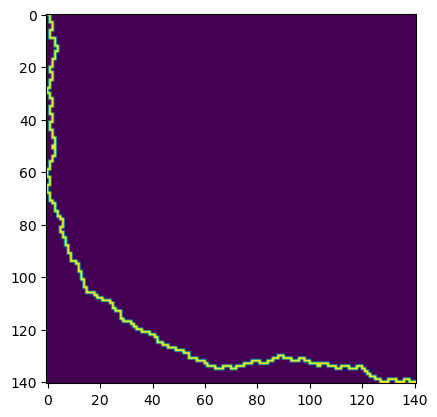

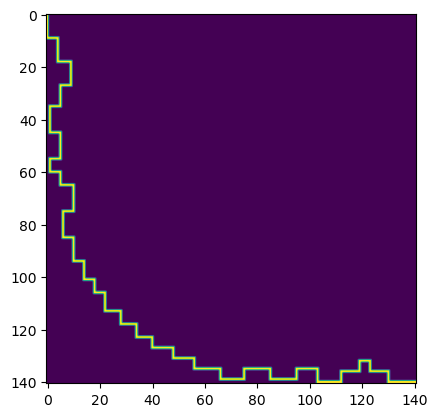

In [17]:
from collections import namedtuple
import heapq
with open('day17.txt') as fid:
    data = fid.read().strip().split('\n')

heat_loss_map = [[int(c) for c in s] for s in data]
Ncol, Nrow = len(heat_loss_map[0]), len(heat_loss_map)
Crucible = namedtuple("Crucible", ['heatloss', 'pos', 'straight_moves', 'direction', 'path'])

def find_best_route(min_straight_moves, max_straight_moves, startpos=(0, 0), finish=((Nrow - 1, Ncol - 1)), get_path=False):
    all_paths = [Crucible(0, startpos, -max_straight_moves, (0, 0), [])]
    heat_loss_dict = {}
    while True:
        valpos = heapq.heappop(all_paths)
        pos = (-valpos.pos[0], -valpos.pos[1])
        heatloss = valpos.heatloss + heat_loss_map[pos[0]][pos[1]]
        if pos == finish:
            if get_path:
                valpos.path.append(pos)
            break
        key = pos + valpos.direction
        if (key in heat_loss_dict 
            and heat_loss_dict[key][0] <= heatloss 
            and heat_loss_dict[key][1] >= abs(valpos.straight_moves)):
            continue
        if get_path:
            valpos.path.append((pos))
        heat_loss_dict[key] = (heatloss, abs(valpos.straight_moves))
        for direction in [(0, 1), (0, -1), (-1, 0), (1, 0)]:
            if direction == (-valpos.direction[0], -valpos.direction[1]):
                continue
            if direction == valpos.direction:
                if abs(valpos.straight_moves) == 0:
                    continue
                straight_moves = abs(valpos.straight_moves) - 1
                newpos = (pos[0] + direction[0], pos[1] + direction[1])
            else:
                straight_moves = max_straight_moves - min_straight_moves
                newpos = (pos[0] + min_straight_moves*direction[0], pos[1] + min_straight_moves*direction[1])
            if not (0 <= newpos[0] < Nrow and 0 <= newpos[1] < Ncol):
                continue
            newheatloss = heatloss
            newpath = [p for p in valpos.path] if get_path else []
            if direction != valpos.direction:
                for j in range(1, min_straight_moves):
                    col2 = pos[0] + j*direction[0]
                    row2 = pos[1] + j*direction[1]
                    if get_path:
                        newpath.append((col2, row2))
                    newheatloss += heat_loss_map[col2][row2]
            new_crucible = Crucible(newheatloss, (-newpos[0], -newpos[1]) ,-straight_moves, direction, newpath)
            heapq.heappush(all_paths, new_crucible)
    return valpos

def make_plot(crucible):
    import matplotlib.pyplot as plt
    plt.figure()
    m = np.zeros((Nrow, Ncol))
    for p in crucible.path:
        m[p[0],p[1]] = 1
    plt.imshow(m)

get_path = True
best_crucible = find_best_route(1, 3, get_path=True)
print(best_crucible.heatloss + heat_loss_map[Nrow - 1][Ncol - 1] - heat_loss_map[0][0])
if get_path:
    make_plot(best_crucible)

# Part two
best_crucible = find_best_route(4, 10, get_path=True)
print(best_crucible.heatloss + heat_loss_map[Nrow - 1][Ncol - 1] - heat_loss_map[0][0])
if get_path:
    make_plot(best_crucible)


In [18]:
# Day 18
# Part one
from collections import namedtuple
Trench = namedtuple('Trench', ['direction', 'length', 'rgb'])

with open('day18.txt') as fid:
    data = fid.read().strip().split('\n')

offsets = {'U':(-1, 0), 'D':(1,0), 'R':(0, 1), 'L':(0, -1)}
all_trenches = []
for d in data:
    UDRL, d, rgbhex = d.split()
    all_trenches.append(Trench(offsets[UDRL], int(d), rgbhex[2:-1]))

def get_area(trenches):
    pos = (0,0)
    line_integral = 0
    total_length = 0
    for t in trenches:
        pos = (pos[0] + t.length*t.direction[0], pos[1] + t.length*t.direction[1])
        line_integral += pos[0]*t.length*t.direction[1]
        total_length += t.length
    return abs(line_integral) + total_length//2 + 1

print(get_area(all_trenches))

# Part two
# 0 means R, 1 means D, 2 means L, and 3 means U.
offsets = {'3':(-1, 0), '1':(1,0), '0':(0, 1), '2':(0, -1)}
all_trenches = []
for d in data:
    UDRL, d, rgbhex = d.split()
    rgbhex = rgbhex[2:-1]
    all_trenches.append(Trench(offsets[rgbhex[-1]], int(rgbhex[:-1], 16), rgbhex))
print(get_area(all_trenches))


56923
66296566363189


In [19]:
# Day 19
# Part one
from collections import namedtuple
with open('day19.txt') as fid:
    workflow_strings, item_strings = fid.read().strip().split('\n\n')
XmasItem = namedtuple('XmasItem', ['x','m','a','s'])

item_strings = item_strings.replace('{x=','').replace('}', '').replace('m=','').replace('a=','').replace('s=','')
all_workflows = {}
all_items = [XmasItem(*map(int, line.split(','))) for line in item_strings.split('\n')]

for line in workflow_strings.split('\n'):
    key, comparestring = line.split('{')
    comparestring = comparestring[:-1]
    all_destinations_for_workflow = []
    for index_item, item in enumerate(all_items):
        comparisons = comparestring.split(',')
        item_destination = comparisons[-1]
        for tmp in comparisons[:-1]:
            comp, dest = tmp.split(':')
            s = 'item.' + comp
            if eval('item.' + comp):
                item_destination = dest
                break         
        all_destinations_for_workflow.append(item_destination)
    all_workflows[key] = all_destinations_for_workflow

total_sum = 0
for index_item, item in enumerate(all_items):
    is_R_or_A = False
    workflow = 'in'
    while True:
        if workflow == 'R':
            break
        elif workflow == 'A':
            total_sum += sum(item)
            break
        workflow = all_workflows[workflow][index_item]
print(total_sum)

# Part two
workflow_dict = {}
for line in workflow_strings.split('\n'):
    key, comparestring = line.split('{')
    workflow_dict[key] = comparestring[:-1].split(',')

def split_item_less(item, index, number):
    # item.x < number
    lower = item[index][0]
    upper = item[index][1]
    if upper < number:
        return item, None
    elif lower >= number:
        return None, item
    else:
        tmp_item = [item[j] for j in range(4)]
        tmp_item[index] = (lower, number - 1)
        true_item = XmasItem(*tmp_item)
        tmp_item = [item[j] for j in range(4)]
        tmp_item[index] = (number, upper)
        false_item = XmasItem(*tmp_item)
        return true_item, false_item
    
def split_item_greater(item, index, number):
    # item.x > number
    lower = item[index][0]
    upper = item[index][1]
    if upper < lower:
        return None, None
    if lower > number:
        return item, None
    elif upper <= number:
        return None, item
    else:
        tmp_item = [item[j] for j in range(4)]
        tmp_item[index] = (number + 1, upper)
        true_item = XmasItem(*tmp_item)
        tmp_item = [item[j] for j in range(4)]
        tmp_item[index] = (lower, number)
        false_item = XmasItem(*tmp_item)
        return true_item, false_item
        

def map_item(item, dest):
    if dest == 'R' or item == None:
        return 0
    elif dest == 'A':
        return ((item.x[1] - item.x[0] + 1)*
                (item.m[1] - item.m[0] + 1)*
                (item.a[1] - item.a[0] + 1)*
                (item.s[1] - item.s[0] + 1))
    # Evaluate workflow
    workflow = workflow_dict[dest]
    final_destination = workflow[-1]
    value = 0
    for tmp in workflow[:-1]:
        comp, dest = tmp.split(':')
        index = 'xmas'.find(comp[0])
        number = int(comp[2:])
        if comp[1] == '<':
            true_item, false_item = split_item_less(item, index, number)
        elif comp[1] == '>':
            true_item, false_item = split_item_greater(item, index, number)
        value += map_item(true_item, dest)
        item = false_item
    value += map_item(item, final_destination)
    return value

start = XmasItem(*[(1, 4000)]*4)
s = map_item(start, 'in')
print(s)

432788
142863718918201


In [20]:
# Day 20
# Part one
from collections import namedtuple, deque
ComModule = namedtuple('ComModule', ['destinations', 'type', 'state'])
with open('day20.txt') as fid:
    s = fid.read().strip()

com_modules = {}
for line in s.split('\n'):
    typekey, dest = line.split(' -> ')
    destinations = tuple(dst.strip() for dst in dest.split(','))
    if typekey == 'broadcaster':
        com_modules[typekey] = ComModule(destinations, typekey, [0])
    else:
        state = [0] if typekey[0] == '%' else {}
        com_modules[typekey[1:]] = ComModule(destinations, typekey[0], state)
# Add receivers to '&' modules. We cannot use default dict here...
for key, mod in com_modules.items():
    for dst in mod.destinations:
        if dst in com_modules and com_modules[dst].type == '&':
            com_modules[dst].state[key] = 0

Nlo = 0
Nhi = 0
for j in range(1000):
    signal_queue = deque((dst, 0, 'broadcaster') for dst in com_modules['broadcaster'].destinations)
    Nlo_add = 1
    Nhi_add = 0
    while len(signal_queue) > 0:
        dst, lohi, origin = signal_queue.popleft()
        if lohi == 0:
            Nlo_add += 1
        else:
            Nhi_add += 1
        #print(f'{dst=}, {lohi=}, {mod=}')
        lohistr = 'high' if lohi else 'low'
        #print(f'{origin} -{lohistr} -> {dst}')
        
        if dst not in com_modules:
            continue
        mod = com_modules[dst]
        
        if mod.type == '%':
            if lohi == 1:
                continue
            mod.state[0] = (mod.state[0] + 1) % 2
            new_signal = mod.state[0]
        elif mod.type == '&':
            mod.state[origin] = lohi
            new_signal = 0 if all(val for val in mod.state.values()) else 1
        for dst_out in mod.destinations:
            signal_queue.append((dst_out, new_signal, dst))
    #cache[key] = (Nlo_add, Nhi_add)
    Nlo += Nlo_add
    Nhi += Nhi_add
    #print(Nlo_add, Nhi_add)

#for key, mod in com_modules.items():
#    print(key, mod.state)
print(Nlo*Nhi)

# Part two

# Part one
from collections import namedtuple, deque
ComModule = namedtuple('ComModule', ['destinations', 'type', 'state'])

with open('day20.txt') as fid:
    s = fid.read().strip()
    
def get_state(com_modules):
    smod = '0b'
    other = []
    for key, mod in com_modules.items():
        if mod.type == '%':
            smod += str(mod.state[0])
        elif mod.type == '&':
            tmp = ''.join(map(str, mod.state.values()))
            other.append(eval('0b' + tmp))
    return (eval(smod),) + tuple(other)

com_modules = {}
for line in s.split('\n'):
    typekey, dest = line.split(' -> ')
    destinations = tuple(dst.strip() for dst in dest.split(','))
    if typekey == 'broadcaster':
        com_modules[typekey] = ComModule(destinations, typekey, [0])
    else:
        state = [0] if typekey[0] == '%' else {}
        com_modules[typekey[1:]] = ComModule(destinations, typekey[0], state)
# Add receivers to '&' modules. We cannot use default dict here...
for key, mod in com_modules.items():
    for dst in mod.destinations:
        if dst in com_modules and com_modules[dst].type == '&':
            com_modules[dst].state[key] = 0
            
# Built receive tree
# Add receivers to '&' modules. We cannot use default dict here...
receivers = defaultdict(list)
for key, mod in com_modules.items():
    for dst in mod.destinations:
        receivers[dst].append(key)
        
all_deps = defaultdict(set)
def unravel_tree(node):
    all_deps[start_node].add(node)
    for r in receivers[node]:
        if r in all_deps[start_node]:
            continue
        unravel_tree(r)

for node in receivers[receivers['rx'][0]]:
    start_node = node
    unravel_tree(node)

sep_com_modules = {}
for node, dependents in all_deps.items():
    sep_com_modules[node] = {dep:com_modules[dep] for dep in dependents if dep != 'broadcaster'}

cache = defaultdict(dict)
cycle_dict = {}

for j in range(100000):
    break_all = False
    for node, cms in sep_com_modules.items():
        key = get_state(cms)
        if key in cache[node] and node not in cycle_dict:
            cycle_dict[node] = j - cache[node][key]
            if len(cycle_dict) == 4:
                break_all = True
        else:
            cache[node][key] = j
    if break_all:
        #print('Done!')
        break
    signal_queue = deque((dst, 0, 'broadcaster') for dst in com_modules['broadcaster'].destinations)
    break_outer = False
    
    while len(signal_queue) > 0:
        dst, lohi, origin = signal_queue.popleft()
        if lohi == 0:
            Nlo_add += 1
        else:
            Nhi_add += 1
        if dst not in com_modules:
            continue
        mod = com_modules[dst]
        
        if mod.type == '%':
            if lohi == 1:
                continue
            mod.state[0] = (mod.state[0] + 1) % 2
            new_signal = mod.state[0]
        elif mod.type == '&':
            mod.state[origin] = lohi
            new_signal = 0 if all(val for val in mod.state.values()) else 1
        for dst_out in mod.destinations:
            signal_queue.append((dst_out, new_signal, dst))
    
import math
print(math.lcm(*cycle_dict.values()))



808146535
224602953547789


In [21]:
# Day 21
# Part one
with open('day21.txt') as fid:
    grid = fid.read().strip().split('\n')

Ny, Nx = len(grid), len(grid[0])

rocks = set()
for index_row, row in enumerate(grid):
    for index_col, c in enumerate(row):
        if c == '#':
            rocks.add((index_row, index_col))
        elif c == 'S':
            start = (index_row, index_col)

import heapq
from collections import namedtuple
Snake = namedtuple('Snake', ['steps', 'j', 'i'])
offsets = ((0, 1), (0, -1), (1, 0), (-1, 0))
snakes = [Snake(0, start[0], start[1])]
exclusion_dict = {}
while snakes:
    S = heapq.heappop(snakes)
    if not (0 <= S.i < Nx and 0 <= S.j < Ny):
        continue
    if S.steps > 64:
        continue
    key = (S.j, S.i)
    if key in exclusion_dict or key in rocks:
        continue
    exclusion_dict[key] = S.steps
    for offset in offsets:
        heapq.heappush(snakes, Snake(S.steps + 1, S.j + offset[0], S.i + offset[1]))

reachable_positions = {key for key, val in exclusion_dict.items() if val % 2 == 0}
print(len(reachable_positions))

# Part two
snakes = [Snake(0, start[0], start[1])]
exclusion_dict = {}
while snakes:
    S = heapq.heappop(snakes)
    if S.steps > (65 + 2*2*131):
        continue
    key = (S.j, S.i)
    modkey = (S.j % Ny, S.i % Nx)
    if key in exclusion_dict or modkey in rocks:
        continue
    exclusion_dict[key] = S.steps
    for offset in offsets:
        heapq.heappush(snakes, Snake(S.steps + 1, S.j + offset[0], S.i + offset[1]))
v = [sum((val % 2 == 1 and val <= (65 + 2*n*131)) for val in exclusion_dict.values()) for n in range(3)]
n = (26501365 - 65)//(131*2)
a0 = v[0]
a2 = -v[1] + v[0] + (v[2] - v[0])//2
a1 = v[1] - a0 - a2
print(a0 + a1*n + a2*n*n)

3666
609298746763952


In [22]:
# Day 22
# Part one
with open('day22.txt') as fid:
    s = fid.read().strip().split('\n')

identifiers = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
from collections import namedtuple, defaultdict
Brick = namedtuple('Brick', ['xyzmin', 'xyzmax', 'id'])

bricks = []
for index_line, line in enumerate(s):
    point_left, point_rght = line.split('~')
    xl, yl, zl = map(int, point_left.split(','))
    xr, yr, zr = map(int, point_rght.split(','))
    brick_id = identifiers[index_line % len(identifiers)] + str(index_line // len(identifiers))
    bricks.append(Brick([min(xl, xr), min(yl, yr), min(zl, zr)], 
                        [max(xl, xr), max(yl, yr), max(zl, zr)],
                        brick_id))
    
def get_points(brick):
    points = []
    for x in range(brick.xyzmin[0], brick.xyzmax[0] + 1):
        for y in range(brick.xyzmin[1], brick.xyzmax[1] + 1):
            for z in range(brick.xyzmin[2], brick.xyzmax[2] + 1):
                points.append((x, y, z))
    return points

def move_brick_down(brick):
    brick.xyzmin[2] -= 1
    brick.xyzmax[2] -= 1

def move_brick_up(brick):
    brick.xyzmin[2] += 1
    brick.xyzmax[2] += 1


sorted_bricks = sorted(bricks, key=lambda b:b.xyzmin[2])
#print(sorted_bricks)
ex_dict = {}
supported_by = defaultdict(set)

for brick in sorted_bricks:
    while True:
        move_brick_down(brick)
        if brick.xyzmin[2] < 1:
            break
        brick_points = get_points(brick)
        for brick_point in brick_points:
            if brick_point in ex_dict:
                supported_by[brick.id].add(ex_dict[brick_point])
        if brick.id in supported_by:
            break
    move_brick_up(brick)
    for point in get_points(brick):
        ex_dict[point] = brick.id

#for brick_id, val in supported_by.items():
#    print(f'{brick_id} is supported by {val}')

single_supporters = {next(iter(val)) for val in supported_by.values() if len(val) == 1}
removable = {brick.id for brick in bricks if brick.id not in single_supporters}
print(len(removable))

# Part two
import copy
count_consequences = defaultdict(int)
for index, brick in enumerate(sorted_bricks):
    bricks2 = copy.deepcopy(sorted_bricks)
    bricks2.pop(index)
    supported_by = defaultdict(set)
    ex_dict = {}
    for brick2 in bricks2:
        could_move = False
        while True:
            move_brick_down(brick2)
            if brick2.xyzmin[2] < 1:
                break
            brick_points = get_points(brick2)
            for brick_point in brick_points:
                if brick_point in ex_dict:
                    supported_by[brick2.id].add(ex_dict[brick_point])
            if brick2.id in supported_by:
                break
            could_move = True
        if could_move:
            count_consequences[brick.id] += 1
        move_brick_up(brick2)
        for point in get_points(brick2):
            ex_dict[point] = brick2.id
print(sum(count_consequences.values()))

407
59266


In [23]:
# Day 23
# Part one
with open('day23.txt') as fid:
    grid = fid.read().strip().split('\n')

from collections import namedtuple, defaultdict
import heapq
import copy

Snake = namedtuple('Snake', ['slopes', 'msteps', 'j', 'i', 'path'])

offsets = ((1, 0), (-1, 0), (0, 1), (0, -1))
slopes = {'<':(0,-1), '>':(0, 1), '^':(-1, 0), 'v':(1,0)}
Nx, Ny = len(grid[0]), len(grid)

start_i = grid[0].find('.')
finish = (Ny - 1, grid[Ny - 1].find('.'))
snakes = [Snake(0, -0, 0, start_i, set())]
killzone = {}
distances = []
while len(snakes) > 0:
    snake = heapq.heappop(snakes)
    pos = (snake.j, snake.i)
    if pos in snake.path:
        continue
    snake.path.add(pos)
    if pos == finish:
        distances.append(-snake.msteps)
        continue
    terrain = grid[snake.j][snake.i]
    if terrain in slopes:
        if pos in killzone and killzone[pos] >= -snake.msteps:
            continue
        else:
            killzone[pos] = -snake.msteps
            os = slopes[terrain]
            j, i = snake.j + os[0], snake.i + os[1]
            if not (0 <= j < Ny and 0 <= i < Nx):
                continue
            new_snake = Snake(snake.slopes, snake.msteps - 1, j, i, copy.deepcopy(snake.path))
            heapq.heappush(snakes, new_snake)
            continue
    else:
        for os in offsets:
            j, i = snake.j + os[0], snake.i + os[1]
            if not (0 <= j < Ny and 0 <= i < Nx):
                continue
            terrain = grid[j][i]
            if terrain == '#':
                continue
            add_slope = terrain in slopes
            new_snake = Snake(snake.slopes + add_slope, snake.msteps - 1, j, i, copy.deepcopy(snake.path))
            heapq.heappush(snakes, new_snake)
print(max(distances))

# Part two
possible_offsets = defaultdict(list)
for j in range(Ny):
    for i in range(Nx):
        if grid[j][i] == '#':
            continue
        for os in ((1, 0), (-1, 0), (0, 1), (0, -1)):
            jj, ii = j + os[0], i + os[1]
            if not (0 <= jj < Ny and 0 <= ii < Nx):
                continue
            if grid[jj][ii] == '#':
                continue
            possible_offsets[(j, i)].append(os)


letters = 'ABCDEFGHIJKLMNOPQRTSUVWXYZ'
node_ids = [l + m for l in letters for m in letters]
pos_to_name = {}
index_node = 0
for key, val in possible_offsets.items():
    if len(val) > 2:
        pos_to_name[key] = node_ids[index_node]
        index_node += 1
        
        
start = (0, grid[0].find('.'))
finish = (Ny - 1, grid[Ny - 1].find('.'))
pos_to_name[start] = 'Start'
pos_to_name[finish] = 'Finish'

def move_to_next_node(pos, direction, steps):
    if pos in pos_to_name:
        return pos, direction, steps
    for os in possible_offsets[pos]:
        if os == (-direction[0], -direction[1]):
            continue
        new_pos = (pos[0] + os[0], pos[1] + os[1])
        return move_to_next_node(new_pos, os, steps + 1)

dist_graph = defaultdict(dict)
for pos, node_id in pos_to_name.items():
    for os in possible_offsets[pos]:
        new_pos = (pos[0] + os[0], pos[1] + os[1])
        if (next_pos_dir_steps := move_to_next_node(new_pos, os, 1)):
            next_pos, next_dir, next_steps = next_pos_dir_steps
            next_node_id = pos_to_name[next_pos]
            dist_graph[node_id][next_node_id] = (next_steps, os, next_dir)

def find_max_to_finish(node, steps, path):
    if 'Finish' in dist_graph[node]:
        return steps + dist_graph[node]['Finish'][0]
    if node in path:
        return 0
    path.add(node)
    max_steps = 0
    for next_node, steps_etc in dist_graph[node].items():
        max_steps = max(max_steps, find_max_to_finish(next_node, steps + steps_etc[0], {p for p in path}))
    return max_steps
    
print(find_max_to_finish('Start', 0, set()))

2294
6418


In [24]:
# Day 24
# Part one
s = '''19, 13, 30 @ -2,  1, -2
18, 19, 22 @ -1, -1, -2
20, 25, 34 @ -2, -2, -4
12, 31, 28 @ -1, -2, -1
20, 19, 15 @  1, -5, -3'''.split('\n')
with open('day24.txt') as fid:
    s = fid.read().strip().split('\n')


import numpy as np
pos_vel = np.array([[int(t.strip()) for t in line.replace('@', ',').split(',')] for line in s])

#xmin = 7#200_000_000_000_000
#xmax = 27#400_000_000_000_000
xmin = 200000000000000
xmax = 400000000000000
ymin = xmin
ymax = xmax

num_intersections = 0
for i in range(pos_vel.shape[0]):
    for j in range(i + 1, pos_vel.shape[0]):
        p1 = pos_vel[i, :2]
        p2 = pos_vel[j, :2]
        v1 = pos_vel[i, 3:5]
        v2 = pos_vel[j, 3:5]
        
        b = p2 - p1
        d1 =  b[0]*v2[1]  - b[1]*v2[0]
        d2 = v1[0]*v2[1] - v1[1]*v2[0]
        d3 = v1[0]*b[1]  - v1[1]*b[0]
        does_intersect = True
        if b[0] == b[1] == 0:
            intersection = p1
        elif d2 == 0:
            does_intersect = False
        else:
            t1 = d1/d2
            t2 = d3/d2
            if t1 < 0 or t2 > 0:
                does_intersect = False
            intersection = p1 + t1*v1
        if does_intersect:
            #print(f'{v1=}, {v2=}')
            #print(f'{i=}, {j=}, {p1=}, {p2=}, {intersection=}')
            num_intersections += (xmin <= intersection[0] <= xmax and ymin <= intersection[1] <= ymax)
print(num_intersections)


13149


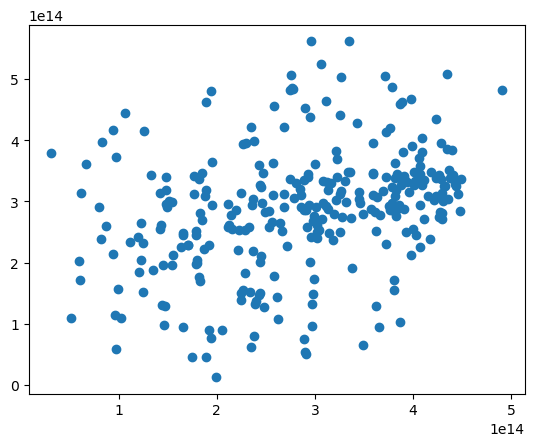

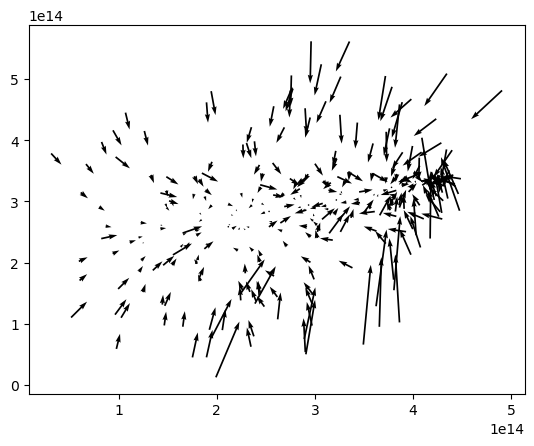

In [25]:
import matplotlib.pyplot as plt
plt.scatter(pos_vel[:,0], pos_vel[:,1])
plt.figure()
plt.quiver(pos_vel[:,0], pos_vel[:,1], pos_vel[:,3], pos_vel[:,4])

In [26]:
def fun(y):
    # y = [P0x P0y P0z V0x V0y V0z ta tb tc]
    #P0x, P0y, P0z, V0x, V0y, V0z, ta, tb, tc = y
    idx = 3
    P0 = y[:3]
    V0 = y[3:6]
    T = y[6:]
    out = np.zeros(9)
    for j in range(3):
        P = pos_vel[idx + j, :3]
        V = pos_vel[idx + j, 3:]
        out[3*j:(3*(j + 1))] = P + T[j]*V - P0 - T[j]*V0
    return out

import scipy
guess = [5e14, 3e14, 3e14, -100, 1, 1, 1e12, 2e12, 3e12]
sol = scipy.optimize.fsolve(fun, guess)
    
V0 = np.array([-299, -98, 79], dtype=int)
p1x, p1y = pos_vel[0, 0], pos_vel[0, 1]
p2x, p2y = pos_vel[1, 0], pos_vel[1, 1]
Vd1x, Vd1y = pos_vel[0, 3] - V0[0], pos_vel[0, 4] - V0[1]
Vd2x, Vd2y = pos_vel[1, 3] - V0[0], pos_vel[1, 4] - V0[1]

t1m = -((p1y*Vd2x - p2y*Vd2x - p1x*Vd2y + p2x*Vd2y)//(Vd1y*Vd2x - Vd1x*Vd2y))
Vdiff = pos_vel[0, 3:] - V0
P0x = pos_vel[0, 0] + t1m*Vdiff[0]
P0y = pos_vel[0, 1] + t1m*Vdiff[1]
P0z = pos_vel[0, 2] + t1m*Vdiff[2]
print(P0x + P0y + P0z)

1033770143421619


In [28]:
# Day 25
# Part one
with open('day25.txt') as fid:
    data = fid.read().strip().split('\n')
from collections import defaultdict
graph = defaultdict(set)
    
for d in data:
    key, valstring = d.split(':')
    for key2 in valstring.split():
        graph[key2].add(key)
        graph[key].add(key2)

from collections import deque

def get_ordering(peripheral_vertex, reverse=False):
    order = len(graph) - 1 if reverse else 0
    delta = -1 if reverse else 1
    R = {}
    all_nodes = deque()
    all_nodes.append(peripheral_vertex)
    while len(all_nodes) > 0:
        node = all_nodes.popleft()
        if node in R:
            continue
        R[node] = order
        order += delta
        next_nodes = sorted(graph[node], key=lambda n: len(graph[n]), reverse=False)
        for next_node in next_nodes:
            all_nodes.append(next_node)    
    return R

min_level = min(len(val) for val in graph.values())
peripheral_vertices = [key for key, val in graph.items() if len(val) == min_level]

all_done = False
for pv in peripheral_vertices:
    pd = get_ordering(pv, reverse=True)
    pd_inv = {val:key for key, val in pd.items()}

    #For some reason, this is twice as slow as forming the dense matrix and relying on numpy for speed!
    #for k in range(1, len(graph)):
    #    some_sum = 0
    #    for j in range(k):
    #        key2 = pd_inv[j]
    #        some_sum += sum(pd[other_key] >= k for other_key in graph[key2])
    #        if some_sum > 3:
    #            break
    
    m2 = np.zeros((len(graph), len(graph)), dtype=int)
    for key1, index1 in pd.items():
        for key2 in graph[key1]:
            index2 = pd[key2]
            m2[index1, index2] = 1
            m2[index2, index1] = 1

    #plt.imshow(m2)
    for k in range(1, m2.shape[0]):
        some_sum = m2[:k, k:].sum().sum()
        #print(f'{k=}, {some_sum=}, {vec[k - 1]}')
        if some_sum <= 3:
            all_done = True
            print(f'{k*(m2.shape[0] - k)}')
            break
            #dj, di = np.nonzero(m2[:k, k:])
            #for jj, ii in zip(dj, di + k):
            #    print(pd_inv[jj], pd_inv[ii])
    if all_done:
        break


543564
